## 1. Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import src.util as utils
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Configuration File

In [2]:
config = utils.load_config()

## 3. Load Dataset

In [3]:
dataset = pd.read_csv(config["dataset_path"])

In [4]:
dataset

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-06-01,DKI1 (Bunderan HI),59,83,22,18,19,35,83,PM25,BAIK
1,2021-06-02,DKI1 (Bunderan HI),59,84,21,20,24,38,84,PM25,BAIK
2,2021-06-03,DKI1 (Bunderan HI),54,76,22,20,17,41,76,PM25,BAIK
3,2021-06-04,DKI1 (Bunderan HI),63,87,20,13,14,30,87,PM25,BAIK
4,2021-06-05,DKI1 (Bunderan HI),59,79,23,20,19,38,79,PM25,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
1065,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,BAIK
1066,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,BAIK
1067,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,BAIK
1068,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,BAIK


## 4. Data Clansing

### Remove missing value

In [5]:
#definisikan nilai missing yang kemungkinan terjadi
missing_values = ['', ' ', 'NaN', 'Nan', 'nan', '.', ',','---']
col_names = list(dataset.columns)
dataset[col_names] = dataset[col_names].replace(missing_values, np.nan)
dataset.isna().sum()

tanggal      0
stasiun      0
pm10        34
pm25        29
so2         97
co          16
o3          37
no2         14
max          0
critical     9
categori     1
dtype: int64

In [6]:
dataset = dataset.dropna()
dataset.isna().sum()

tanggal     0
stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

### Feature Engineering - Feature Selection

In [7]:
dataset = dataset.drop(['tanggal'], axis=1)
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,DKI1 (Bunderan HI),59,83,22,18,19,35,83,PM25,BAIK
1,DKI1 (Bunderan HI),59,84,21,20,24,38,84,PM25,BAIK
2,DKI1 (Bunderan HI),54,76,22,20,17,41,76,PM25,BAIK
3,DKI1 (Bunderan HI),63,87,20,13,14,30,87,PM25,BAIK
4,DKI1 (Bunderan HI),59,79,23,20,19,38,79,PM25,BAIK
...,...,...,...,...,...,...,...,...,...,...
1065,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,BAIK
1066,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,BAIK
1067,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,BAIK
1068,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,BAIK


### Label encoding

In [8]:
dataset['categori'].value_counts()

BAIK           716
TIDAK SEHAT    186
Name: categori, dtype: int64

In [9]:
dataset['categori'] = dataset['categori'].replace(['SEDANG'], 'BAIK')
dataset['categori'].value_counts()

BAIK           716
TIDAK SEHAT    186
Name: categori, dtype: int64

In [10]:
dataset['stasiun'].value_counts()

DKI1 (Bunderan HI)                  213
DKI2 (Kelapa Gading)                191
DKI3 (Jagakarsa)                    191
DKI4 (Lubang Buaya)                 170
DKI5 (Kebon Jeruk) Jakarta Barat    137
Name: stasiun, dtype: int64

In [11]:
dataset['critical'].value_counts()

PM25    869
SO2      18
PM10     13
O3        2
Name: critical, dtype: int64

In [12]:
label_encoder = preprocessing.LabelEncoder()

#kolom stasiun
dataset['stasiun']= label_encoder.fit_transform(dataset['stasiun'])

#kolom critical
dataset['critical']= label_encoder.fit_transform(dataset['critical'])

#kolom categori
dataset['categori'] = dataset['categori'].replace(['BAIK', 'TIDAK SEHAT'],[1, 0])

dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,0,59,83,22,18,19,35,83,2,1
1,0,59,84,21,20,24,38,84,2,1
2,0,54,76,22,20,17,41,76,2,1
3,0,63,87,20,13,14,30,87,2,1
4,0,59,79,23,20,19,38,79,2,1
...,...,...,...,...,...,...,...,...,...,...
1065,4,54,76,36,14,21,47,76,2,1
1066,4,44,68,20,11,21,33,68,2,1
1067,4,34,54,28,8,25,29,54,2,1
1068,4,53,75,25,15,23,44,75,2,1


In [13]:
dataset['stasiun'].value_counts()

0    213
1    191
2    191
3    170
4    137
Name: stasiun, dtype: int64

In [14]:
dataset['critical'].value_counts()

2    869
3     18
1     13
0      2
Name: critical, dtype: int64

### Balancing data

In [62]:
#smote
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(dataset.iloc[:,:-1], dataset.iloc[:,-1:])
dataset = pd.concat([X_res, y_res], axis=1)
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,0,59.0,83.0,22.0,18.0,19.0,35.0,83.0,2,1
1,0,59.0,84.0,21.0,20.0,24.0,38.0,84.0,2,1
2,0,54.0,76.0,22.0,20.0,17.0,41.0,76.0,2,1
3,0,63.0,87.0,20.0,13.0,14.0,30.0,87.0,2,1
4,0,59.0,79.0,23.0,20.0,19.0,38.0,79.0,2,1
...,...,...,...,...,...,...,...,...,...,...
1427,3,56.511501,102.767251,39.0,10.74425,27.25575,22.74425,102.767251,2,0
1428,3,61.41116,110.20558,41.79442,10.79442,25.58884,22.972101,110.20558,2,0
1429,1,77.514529,108.57558,53.57558,12.42442,44.726739,21.36337,108.57558,2,0
1430,3,60.811165,110.207443,42.396278,10.0,33.603722,25.773949,110.207443,2,0


### Drop duplicate

In [63]:
dataset.duplicated().sum()

0

In [64]:
dataset = dataset.drop_duplicates()
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,0,59.0,83.0,22.0,18.0,19.0,35.0,83.0,2,1
1,0,59.0,84.0,21.0,20.0,24.0,38.0,84.0,2,1
2,0,54.0,76.0,22.0,20.0,17.0,41.0,76.0,2,1
3,0,63.0,87.0,20.0,13.0,14.0,30.0,87.0,2,1
4,0,59.0,79.0,23.0,20.0,19.0,38.0,79.0,2,1
...,...,...,...,...,...,...,...,...,...,...
1427,3,56.511501,102.767251,39.0,10.74425,27.25575,22.74425,102.767251,2,0
1428,3,61.41116,110.20558,41.79442,10.79442,25.58884,22.972101,110.20558,2,0
1429,1,77.514529,108.57558,53.57558,12.42442,44.726739,21.36337,108.57558,2,0
1430,3,60.811165,110.207443,42.396278,10.0,33.603722,25.773949,110.207443,2,0


## 5. Data Defense

In [65]:
dataset = dataset.astype(int)
dataset.dtypes

stasiun     int64
pm10        int64
pm25        int64
so2         int64
co          int64
o3          int64
no2         int64
max         int64
critical    int64
categori    int64
dtype: object

In [66]:
dataset.describe()

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
count,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.00000,1432.000000
mean,2.072626,61.194134,94.768156,40.274441,11.646648,30.979749,23.024441,95.351257,2.00000,0.500000
std,1.297863,13.969269,25.537151,11.145225,4.060101,12.427861,9.000821,24.883942,0.16719,0.500175
min,0.000000,15.000000,20.000000,4.000000,2.000000,8.000000,4.000000,26.000000,0.00000,0.000000
25%,1.000000,54.000000,77.000000,33.000000,9.000000,23.000000,17.000000,78.000000,2.00000,0.000000
50%,2.000000,62.000000,100.000000,40.000000,11.000000,28.000000,22.000000,100.500000,2.00000,0.500000
75%,3.000000,69.000000,110.000000,49.000000,14.000000,36.000000,27.000000,110.000000,2.00000,1.000000
max,4.000000,179.000000,174.000000,82.000000,30.000000,81.000000,65.000000,179.000000,3.00000,1.000000


In [67]:
def check_data(input_data, config):
    # Measure the range of input data
    len_input_data = len(input_data)

    # Check data types
    assert input_data.select_dtypes("int").columns.to_list() == config["int_columns"], "an error occurs in int column(s)."

    # Check range of data
    assert input_data[config["int_columns"][0]].between(config["range_stasiun"][0], config["range_stasiun"][1]).sum() == len_input_data, "an error occurs in stasiun range."
    assert input_data[config["int_columns"][1]].between(config["range_pm10"][0], config["range_pm10"][1]).sum() == len_input_data, "an error occurs in pm10 range."
    assert input_data[config["int_columns"][2]].between(config["range_pm25"][0], config["range_pm25"][1]).sum() == len_input_data, "an error occurs in pm25 range."
    assert input_data[config["int_columns"][3]].between(config["range_so2"][0], config["range_so2"][1]).sum() == len_input_data, "an error occurs in so2 range."
    assert input_data[config["int_columns"][4]].between(config["range_co"][0], config["range_co"][1]).sum() == len_input_data, "an error occurs in co range."
    assert input_data[config["int_columns"][5]].between(config["range_o3"][0], config["range_o3"][1]).sum() == len_input_data, "an error occurs in o3 range."
    assert input_data[config["int_columns"][6]].between(config["range_no2"][0], config["range_no2"][1]).sum() == len_input_data, "an error occurs in no2 range."
    assert input_data[config["int_columns"][7]].between(config["range_max"][0], config["range_max"][1]).sum() == len_input_data, "an error occurs in max range."
    assert input_data[config["int_columns"][8]].between(config["range_critical"][0], config["range_critical"][1]).sum() == len_input_data, "an error occurs in critical range."
    assert input_data[config["int_columns"][9]].between(config["range_categori"][0], config["range_categori"][1]).sum() == len_input_data, "an error occurs in categori range."

In [68]:
check_data(dataset, config)

## 6. Data Splitting

In [69]:
x = dataset[config["predictors"]].copy()
y = dataset[config["label"]].copy()

In [70]:
x

,stasiun,pm10,pm25,so2,co,o3,no2,max,critical
0,0,59,83,22,18,19,35,83,2
1,0,59,84,21,20,24,38,84,2
2,0,54,76,22,20,17,41,76,2
3,0,63,87,20,13,14,30,87,2
4,0,59,79,23,20,19,38,79,2
...,...,...,...,...,...,...,...,...,...
1427,3,56,102,39,10,27,22,102,2
1428,3,61,110,41,10,25,22,110,2
1429,1,77,108,53,12,44,21,108,2
1430,3,60,110,42,10,33,25,110,2


In [71]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1427    0
1428    0
1429    0
1430    0
1431    0
Name: categori, Length: 1432, dtype: int64

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42, stratify = y)

In [73]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42, stratify = y_train)

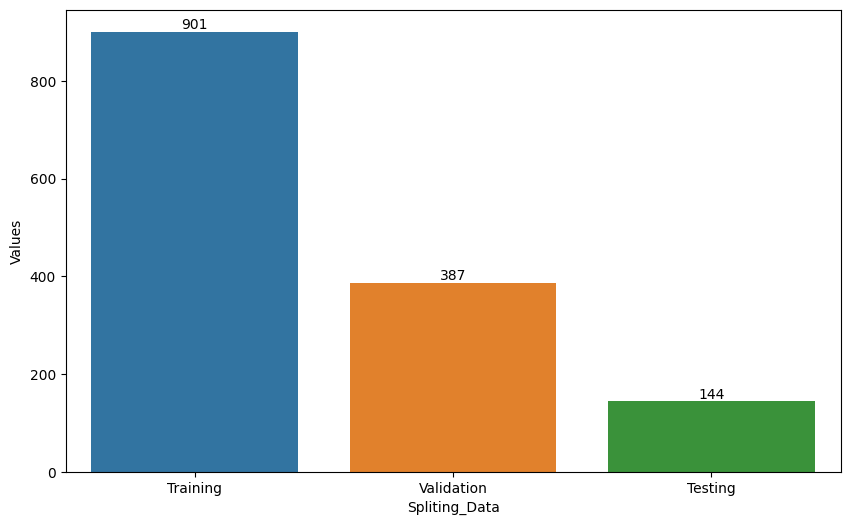

In [74]:
data_split = {
    'Spliting_Data': ['Training', 'Validation', 'Testing'],
    'Values': [len(x_train),len(x_valid),len(x_test)],
}

# Create a DataFrame from the dictionary
data_split = pd.DataFrame(data_split)

#set frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Spliting_Data', y='Values', data=data_split)
plt.bar_label(ax.containers[0])

# Show the plot
plt.show()

In [75]:
utils.pickle_dump(dataset, config["dataset_cleaned_path"])

utils.pickle_dump(x_train, config["train_set_path"][0])
utils.pickle_dump(y_train, config["train_set_path"][1])

utils.pickle_dump(x_valid, config["valid_set_path"][0])
utils.pickle_dump(y_valid, config["valid_set_path"][1])

utils.pickle_dump(x_test, config["test_set_path"][0])
utils.pickle_dump(y_test, config["test_set_path"][1])